In [53]:
import sys
import bs4 as bs
import urllib.request
from datetime import datetime
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import lxml
import seaborn as sns

### Collecting the flow data of the Cheat River from the Albright Gauge # 03070260

In [2]:
source = urllib.request.urlopen('https://nwis.waterservices.usgs.gov/nwis/iv/?format=waterml,2.0&sites=03070260&startDT'
    '=2018-01-01T00:00-0500&endDT=2021-12-31T23:59-0500&parameterCd=00060&siteType=ST&siteStatus=all').read()
soup = bs.BeautifulSoup(source, 'lxml')

In [3]:
cfs = []
timestamp = []

In [4]:
# gatering the cfs and timestamp data
def acquire_data():
    for wml2 in soup.find_all('wml2:value'):
      cfs.append(float(wml2.string))
    for wml2 in soup.find_all('wml2:time'):
      timestamp.append(wml2.string)

    return cfs, timestamp

In [5]:
# Cleaning and organizing the data
def clean_data(in_data):
    df = pd.DataFrame.from_dict(in_data, orient='index')
    df = df.reset_index()
    df = df.rename(columns={'index': 'Date', 0: 'CFS'})
    df['ReDoneDates'] = pd.DatetimeIndex(df['Date']).to_period('D')
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    df['Month'] = df['Month'].astype('int32')
    df['Day'] = pd.DatetimeIndex(df['Date']).day
    df['Day'] = df['Day'].astype('int32')

    return df

In [6]:
# Creating the data
cfs, timestamp = acquire_data()

In [7]:
cfs[:25]

[1070.0,
 1060.0,
 1040.0,
 1030.0,
 1020.0,
 1010.0,
 995.0,
 985.0,
 974.0,
 963.0,
 953.0,
 943.0,
 934.0,
 925.0,
 915.0,
 906.0,
 897.0,
 887.0,
 878.0,
 880.0,
 882.0,
 885.0,
 888.0,
 890.0,
 893.0]

In [8]:
# readjusting date time
i = 0
while i < len(timestamp):
    date_str = timestamp[i][:19]
    timestamp[i] = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S')
    i += 1
del i

In [9]:
out_df = clean_data(dict(zip(timestamp, cfs)))

In [10]:
out_df[:10]

,Date,CFS,ReDoneDates,Month,Day
0,2018-01-01 05:45:00,1070.0,2018-01-01,1,1
1,2018-01-01 07:45:00,1060.0,2018-01-01,1,1
2,2018-01-01 09:45:00,1040.0,2018-01-01,1,1
3,2018-01-01 11:45:00,1030.0,2018-01-01,1,1
4,2018-01-01 13:45:00,1020.0,2018-01-01,1,1
5,2018-01-01 15:45:00,1010.0,2018-01-01,1,1
6,2018-01-01 17:45:00,995.0,2018-01-01,1,1
7,2018-01-01 19:45:00,985.0,2018-01-01,1,1
8,2018-01-01 21:45:00,974.0,2018-01-01,1,1
9,2018-01-01 23:45:00,963.0,2018-01-01,1,1


In [11]:
filtered_df = out_df.loc[(out_df['CFS'] < 2000) & (out_df['CFS'] > 700)].drop_duplicates(subset=['ReDoneDates'], keep='first')

In [12]:
filtered_df[:50]

,Date,CFS,ReDoneDates,Month,Day
0,2018-01-01 05:45:00,1070.0,2018-01-01,1,1
10,2018-01-02 01:45:00,953.0,2018-01-02,1,2
22,2018-01-03 01:45:00,888.0,2018-01-03,1,3
34,2018-01-04 01:45:00,922.0,2018-01-04,1,4
46,2018-01-05 01:45:00,1080.0,2018-01-05,1,5
58,2018-01-06 01:45:00,1140.0,2018-01-06,1,6
70,2018-01-07 01:45:00,1220.0,2018-01-07,1,7
82,2018-01-08 01:45:00,1280.0,2018-01-08,1,8
94,2018-01-09 01:45:00,1320.0,2018-01-09,1,9
106,2018-01-10 01:45:00,1360.0,2018-01-10,1,10


In [13]:
out_df[:15]

,Date,CFS,ReDoneDates,Month,Day
0,2018-01-01 05:45:00,1070.0,2018-01-01,1,1
1,2018-01-01 07:45:00,1060.0,2018-01-01,1,1
2,2018-01-01 09:45:00,1040.0,2018-01-01,1,1
3,2018-01-01 11:45:00,1030.0,2018-01-01,1,1
4,2018-01-01 13:45:00,1020.0,2018-01-01,1,1
5,2018-01-01 15:45:00,1010.0,2018-01-01,1,1
6,2018-01-01 17:45:00,995.0,2018-01-01,1,1
7,2018-01-01 19:45:00,985.0,2018-01-01,1,1
8,2018-01-01 21:45:00,974.0,2018-01-01,1,1
9,2018-01-01 23:45:00,963.0,2018-01-01,1,1


In [14]:
out_df["In Range"] = np.where((out_df.CFS > 700) & (out_df.CFS <2000), True, False)

In [15]:
out_df

,Date,CFS,ReDoneDates,Month,Day,In Range
0,2018-01-01 05:45:00,1070.0,2018-01-01,1,1,True
1,2018-01-01 07:45:00,1060.0,2018-01-01,1,1,True
2,2018-01-01 09:45:00,1040.0,2018-01-01,1,1,True
3,2018-01-01 11:45:00,1030.0,2018-01-01,1,1,True
4,2018-01-01 13:45:00,1020.0,2018-01-01,1,1,True
...,...,...,...,...,...,...
138636,2022-01-01 03:45:00,4500.0,2022-01-01,1,1,False
138637,2022-01-01 04:00:00,4410.0,2022-01-01,1,1,False
138638,2022-01-01 04:15:00,4450.0,2022-01-01,1,1,False
138639,2022-01-01 04:30:00,4460.0,2022-01-01,1,1,False


In [17]:
len(out_df["In Range"] == True)

138641

In [18]:
out_df.resample('D', on='Date').mean()

,CFS,Month,Day,In Range
Date,,,,
2018-01-01,1014.700000,1.0,1.0,1.0
2018-01-02,907.083333,1.0,2.0,1.0
2018-01-03,897.500000,1.0,3.0,1.0
2018-01-04,996.750000,1.0,4.0,1.0
2018-01-05,1107.500000,1.0,5.0,1.0
...,...,...,...,...
2021-12-28,2936.875000,12.0,28.0,0.0
2021-12-29,4830.208333,12.0,29.0,0.0
2021-12-30,7410.208333,12.0,30.0,0.0


In [19]:
single_day_df = out_df.resample('D', on='Date').mean()

In [20]:
single_day_df[:25]

,CFS,Month,Day,In Range
Date,,,,
2018-01-01,1014.700000,1.0,1.0,1.000000
2018-01-02,907.083333,1.0,2.0,1.000000
2018-01-03,897.500000,1.0,3.0,1.000000
2018-01-04,996.750000,1.0,4.0,1.000000
2018-01-05,1107.500000,1.0,5.0,1.000000
2018-01-06,1175.833333,1.0,6.0,1.000000
2018-01-07,1246.666667,1.0,7.0,1.000000
2018-01-08,1292.500000,1.0,8.0,1.000000
2018-01-09,1345.833333,1.0,9.0,1.000000


In [21]:
single_day_df.drop('Month', axis=1)

,CFS,Day,In Range
Date,,,
2018-01-01,1014.700000,1.0,1.0
2018-01-02,907.083333,2.0,1.0
2018-01-03,897.500000,3.0,1.0
2018-01-04,996.750000,4.0,1.0
2018-01-05,1107.500000,5.0,1.0
...,...,...,...
2021-12-28,2936.875000,28.0,0.0
2021-12-29,4830.208333,29.0,0.0
2021-12-30,7410.208333,30.0,0.0


In [22]:
single_day_df.drop("Day", axis=1)

,CFS,Month,In Range
Date,,,
2018-01-01,1014.700000,1.0,1.0
2018-01-02,907.083333,1.0,1.0
2018-01-03,897.500000,1.0,1.0
2018-01-04,996.750000,1.0,1.0
2018-01-05,1107.500000,1.0,1.0
...,...,...,...
2021-12-28,2936.875000,12.0,0.0
2021-12-29,4830.208333,12.0,0.0
2021-12-30,7410.208333,12.0,0.0


In [23]:
single_day_df = single_day_df.drop("Month", axis=1).drop("Day", axis=1)

In [24]:
single_day_df.head()

,CFS,In Range
Date,,
2018-01-01,1014.700000,1.0
2018-01-02,907.083333,1.0
2018-01-03,897.500000,1.0
2018-01-04,996.750000,1.0
2018-01-05,1107.500000,1.0


In [25]:
single_day_df["In Range"] = np.where((single_day_df.CFS > 700) & (single_day_df.CFS <2000), True, False)

In [26]:
single_day_df

,CFS,In Range
Date,,
2018-01-01,1014.700000,True
2018-01-02,907.083333,True
2018-01-03,897.500000,True
2018-01-04,996.750000,True
2018-01-05,1107.500000,True
...,...,...
2021-12-28,2936.875000,False
2021-12-29,4830.208333,False
2021-12-30,7410.208333,False


In [27]:
single_day_df["In Range"].value_counts()

False    964
True     498
Name: In Range, dtype: int64

In [28]:
498/1462

0.34062927496580025

array([[<AxesSubplot:title={'center':'CFS'}>]], dtype=object)

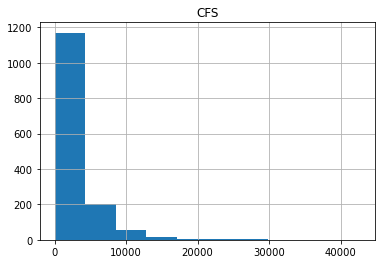

In [29]:
single_day_df.hist()

<AxesSubplot:xlabel='Date'>

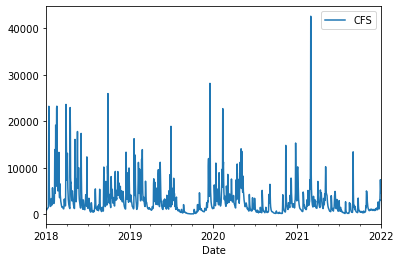

In [30]:
single_day_df.plot()

In [31]:
single_day_df.max()

CFS         42584.375
In Range         True
dtype: object

In [32]:
single_day_df.idxmax()

CFS        2021-03-01
In Range   2018-01-01
dtype: datetime64[ns]

In [33]:
single_day_df.loc["2021-03-01"]

CFS         42584.375
In Range        False
Name: 2021-03-01 00:00:00, dtype: object

In [34]:
single_day_df["In Range"] = single_day_df["In Range"].astype(int)

In [35]:
single_day_df.head()

,CFS,In Range
Date,,
2018-01-01,1014.700000,1
2018-01-02,907.083333,1
2018-01-03,897.500000,1
2018-01-04,996.750000,1
2018-01-05,1107.500000,1


<AxesSubplot:>

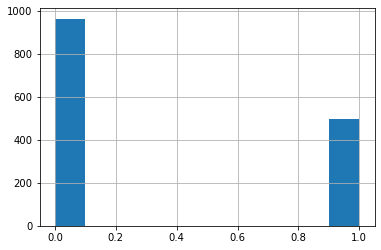

In [36]:
single_day_df['In Range'].hist()

In [37]:
len(single_day_df)

1462

In [38]:
1462/365

4.005479452054795

In [39]:
single_day_df

,CFS,In Range
Date,,
2018-01-01,1014.700000,1
2018-01-02,907.083333,1
2018-01-03,897.500000,1
2018-01-04,996.750000,1
2018-01-05,1107.500000,1
...,...,...
2021-12-28,2936.875000,0
2021-12-29,4830.208333,0
2021-12-30,7410.208333,0


In [40]:
single_day_df["CFS"].isna()

Date
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
              ...  
2021-12-28    False
2021-12-29    False
2021-12-30    False
2021-12-31    False
2022-01-01    False
Freq: D, Name: CFS, Length: 1462, dtype: bool

In [41]:
single_day_df["CFS"].isna().sum()

0

In [42]:
single_day_df

,CFS,In Range
Date,,
2018-01-01,1014.700000,1
2018-01-02,907.083333,1
2018-01-03,897.500000,1
2018-01-04,996.750000,1
2018-01-05,1107.500000,1
...,...,...
2021-12-28,2936.875000,0
2021-12-29,4830.208333,0
2021-12-30,7410.208333,0


<AxesSubplot:xlabel='Date'>

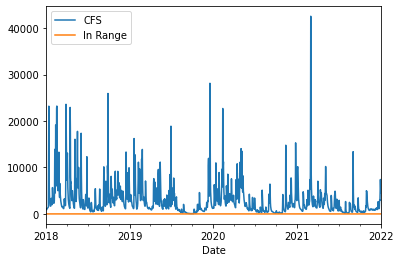

In [43]:
single_day_df.plot()

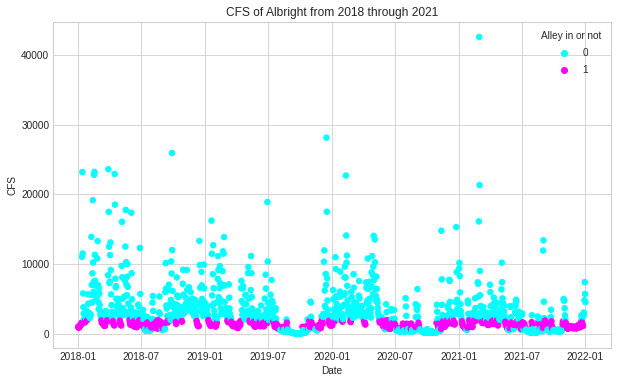

In [76]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=single_day_df.index,
                    y=single_day_df['CFS'],
                    c=single_day_df['In Range'],
                    cmap="cool",
                    s=30)
ax.set(title="CFS of Albright from 2018 through 2021",
      xlabel='Date',
      ylabel="CFS")

ax.legend(*scatter.legend_elements(), title="Alley in or not");


array([[<AxesSubplot:title={'center':'CFS'}>,
        <AxesSubplot:title={'center':'In Range'}>]], dtype=object)

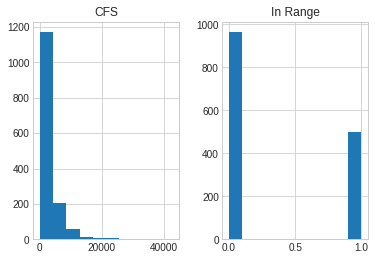

In [78]:
single_day_df.hist()

In [59]:
single_day_df.loc['2018']

,CFS,In Range
Date,,
2018-01-01,1014.700000,1
2018-01-02,907.083333,1
2018-01-03,897.500000,1
2018-01-04,996.750000,1
2018-01-05,1107.500000,1
...,...,...
2018-12-27,2568.333333,0
2018-12-28,4565.625000,0
2018-12-29,9941.354167,0


In [79]:
single_day_df.to_csv("Albright_data.csv")

In [2]:
Albright_data = pd.read_csv("Albright_data.csv")

NameError: name 'pd' is not defined

In [164]:
Albright_data

,Date,CFS,In Range
0,2018-01-01,1014.700000,1
1,2018-01-02,907.083333,1
2,2018-01-03,897.500000,1
3,2018-01-04,996.750000,1
4,2018-01-05,1107.500000,1
...,...,...,...
1457,2021-12-28,2936.875000,0
1458,2021-12-29,4830.208333,0
1459,2021-12-30,7410.208333,0
1460,2021-12-31,5731.770833,0


## Creating a ML model that can say when the alley is in based off of the CFS at Albright

In [154]:
# Creating a model to predict if the alley is in (should be easy?)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()

# Make X & y
X = albright.drop("In Range", axis=1)
y = albright["In Range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

In [155]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([1., 1., 1., 1., 1.])

In [156]:
np.mean(cross_val_score)

1.0

In [157]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [158]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.00985222, 1.        ])

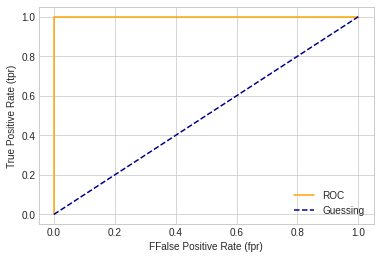

In [160]:
def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle='--', label="Guessing")
    
    # Shine 'er up
    plt.xlabel("FFalse Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [108]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[199,   0],
       [  0,  94]])

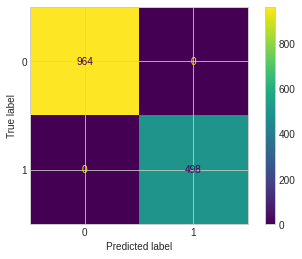

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

In [110]:
# Saving the model for later. I think it is good enough
import pickle

pickle.dump(clf, open("Alley_at_Albright_model.pkl", "wb"))

## Making a line graph where all the years are represented against each other

In [161]:
Albright_data

,CFS,In Range
Date,,
2018-01-01,1014.700000,1
2018-01-02,907.083333,1
2018-01-03,897.500000,1
2018-01-04,996.750000,1
2018-01-05,1107.500000,1
...,...,...
2021-12-28,2936.875000,0
2021-12-29,4830.208333,0
2021-12-30,7410.208333,0


Text(0.5, 0, 'Day of Year')

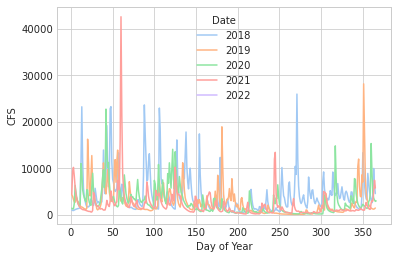

In [165]:
import seaborn as sns

Albright_data['Date'] = pd.to_datetime(Albright_data['Date'])

sns.set_style('whitegrid')
line_plot = sns.lineplot(x=Albright_data['Date'].dt.dayofyear, 
             y=Albright_data['CFS'], 
             hue=Albright_data['Date'].dt.year,
             palette='pastel');
line_plot.set_xlabel("Day of Year")



In [212]:
single_day_df["date"] = single_day_df.index
single_day_df

,CFS,In Range,dat,date
Date,,,,
2018-01-01,1014.700000,1,2018-01-01,2018-01-01
2018-01-02,907.083333,1,2018-01-02,2018-01-02
2018-01-03,897.500000,1,2018-01-03,2018-01-03
2018-01-04,996.750000,1,2018-01-04,2018-01-04
2018-01-05,1107.500000,1,2018-01-05,2018-01-05
...,...,...,...,...
2021-12-28,2936.875000,0,2021-12-28,2021-12-28
2021-12-29,4830.208333,0,2021-12-29,2021-12-29
2021-12-30,7410.208333,0,2021-12-30,2021-12-30


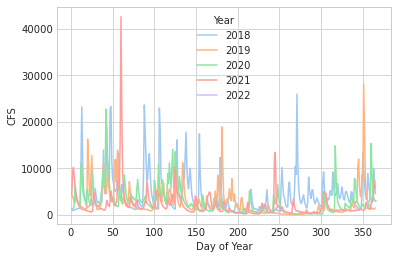

In [214]:
line_plot = sns.lineplot(x=single_day_df['date'].dt.dayofyear, 
             y=single_day_df['CFS'], 
             hue=single_day_df['date'].dt.year,
             palette='pastel');
line_plot.set_xlabel("Day of Year")
line_plot.legend(title="Year")

NameError: name 'Albright_data' is not defined

In [29]:
df = pd.read_csv("Albright_data.csv")

In [30]:
df

,Date,CFS,In Range
0,2018-01-01,1014.700000,1
1,2018-01-02,907.083333,1
2,2018-01-03,897.500000,1
3,2018-01-04,996.750000,1
4,2018-01-05,1107.500000,1
...,...,...,...
1457,2021-12-28,2936.875000,0
1458,2021-12-29,4830.208333,0
1459,2021-12-30,7410.208333,0
1460,2021-12-31,5731.770833,0


In [31]:
df.dtypes

Date         object
CFS         float64
In Range      int64
dtype: object

In [40]:
df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [41]:
df

,Date,CFS,In Range
0,2018-01-01,1014.700000,1
1,2018-01-02,907.083333,1
2,2018-01-03,897.500000,1
3,2018-01-04,996.750000,1
4,2018-01-05,1107.500000,1
...,...,...,...
1457,2021-12-28,2936.875000,0
1458,2021-12-29,4830.208333,0
1459,2021-12-30,7410.208333,0
1460,2021-12-31,5731.770833,0


In [35]:
df.dtypes

Date        datetime64[ns]
CFS                float64
In Range             int64
dtype: object

In [45]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [48]:
df['month'] = pd.DatetimeIndex(df["Date"]).month

In [50]:
df['day'] = pd.DatetimeIndex(df["Date"]).day

In [51]:
df

,Date,CFS,In Range,year,month,day
0,2018-01-01,1014.700000,1,2018,1,1
1,2018-01-02,907.083333,1,2018,1,2
2,2018-01-03,897.500000,1,2018,1,3
3,2018-01-04,996.750000,1,2018,1,4
4,2018-01-05,1107.500000,1,2018,1,5
...,...,...,...,...,...,...
1457,2021-12-28,2936.875000,0,2021,12,28
1458,2021-12-29,4830.208333,0,2021,12,29
1459,2021-12-30,7410.208333,0,2021,12,30
1460,2021-12-31,5731.770833,0,2021,12,31


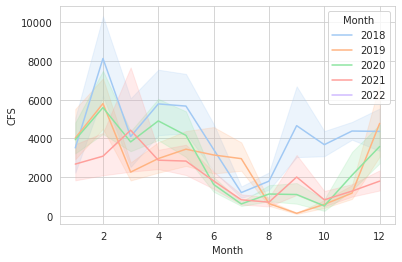

In [65]:

sns.set_style('whitegrid')
line_plot = sns.lineplot(x=pd.DatetimeIndex(df['Date']).month, 
             y=df['CFS'], 
             hue=pd.DatetimeIndex(df["Date"]).year,
             palette='pastel');
line_plot.set_xlabel("Month")
line_plot.legend(title="Month")